In [38]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from emnist import extract_training_samples, extract_test_samples
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


#Normalise data

In [39]:
# Normalize data
x_train = x_train / 255.0
x_test = x_test / 255.0

#loading dataset

In [41]:
from tensorflow.keras.datasets import mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()


#building model

In [42]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

model = Sequential([
    Flatten(input_shape=(28, 28)),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])

In [43]:
# Example of adjusting learning rate dynamically
initial_learning_rate = 0.001
opt = Adam(learning_rate=initial_learning_rate)

# Define a learning rate schedule
def lr_schedule(epoch):
    return initial_learning_rate * 0.9 ** epoch

lr_scheduler = LearningRateScheduler(lr_schedule)

#compiling model

In [44]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


#training model

In [46]:
# Train the model with batch processing
batch_size = 32  # Example batch size
epochs = 20

model.fit(x_train, y_train,
          batch_size=batch_size,  # Specify batch size
          epochs=epochs,
          validation_data=(x_test, y_test), callbacks=[lr_scheduler])

Epoch 1/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.2692 - accuracy: 0.9322 - val_loss: 0.2971 - val_accuracy: 0.9304 - lr: 0.0010
Epoch 2/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2196 - accuracy: 0.9431 - val_loss: 0.2483 - val_accuracy: 0.9381 - lr: 9.0000e-04
Epoch 3/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1846 - accuracy: 0.9513 - val_loss: 0.2875 - val_accuracy: 0.9413 - lr: 8.1000e-04
Epoch 4/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1626 - accuracy: 0.9571 - val_loss: 0.2658 - val_accuracy: 0.9435 - lr: 7.2900e-04
Epoch 5/20
1875/1875 [==============================] - 8s 4ms/step - loss: 0.1459 - accuracy: 0.9609 - val_loss: 0.2241 - val_accuracy: 0.9502 - lr: 6.5610e-04
Epoch 6/20
1875/1875 [==============================] - 10s 5ms/step - loss: 0.1284 - accuracy: 0.9651 - val_loss: 0.2161 - val_accuracy: 0.9522 - lr: 5.9049e-04
Epoch 7/20
1875/1875 [============

#making predictions

In [47]:
predictions = model.predict(x_test)


313/313 [==============================] - 1s 2ms/step


#model's performaance

In [49]:
loss, accuracy = model.evaluate(x_test, y_test, verbose=0)
print(f'Test Accuracy: {accuracy:.4f}')
print(f'loss : {loss:.4f}')


Test Accuracy: 0.9670
loss : 0.2509


#visualizing prediction

1/1 [==============================] - 0s 26ms/step


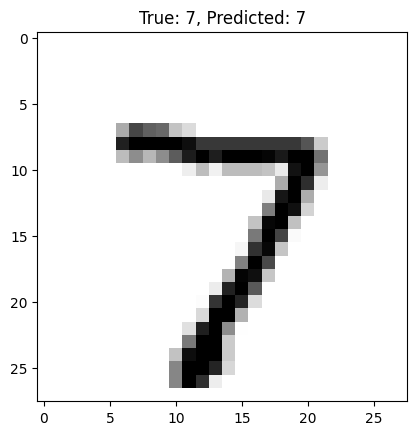

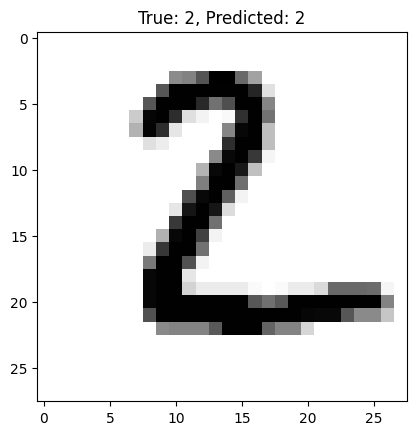

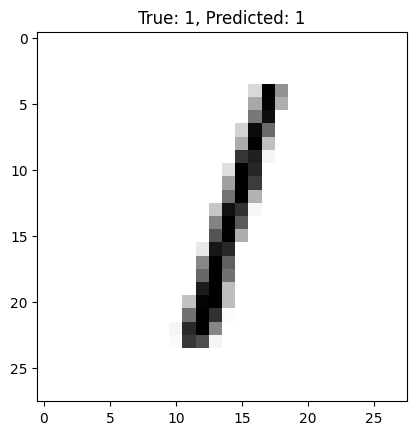

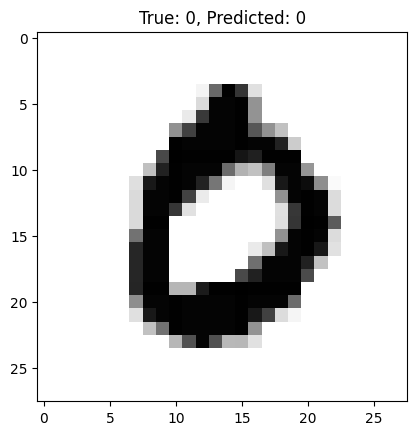

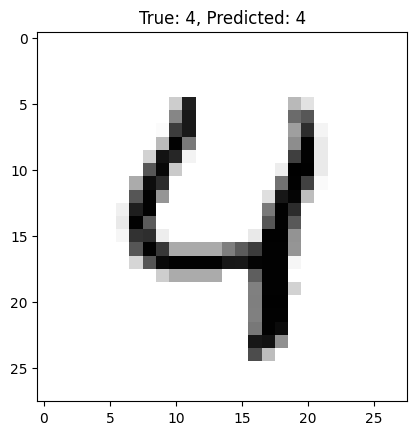

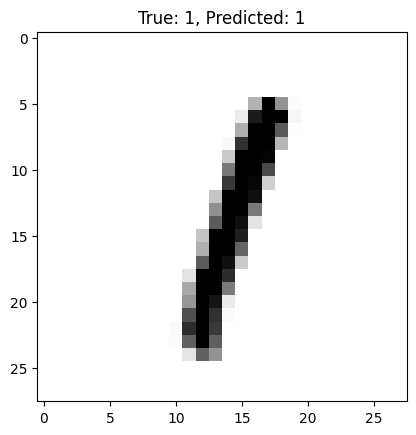

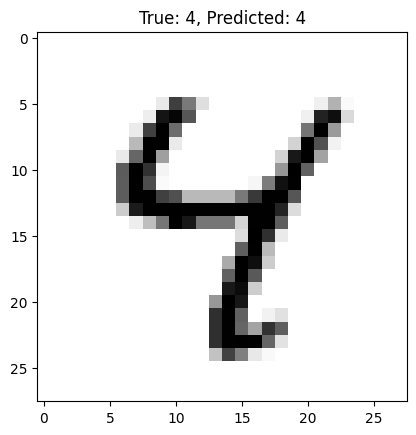

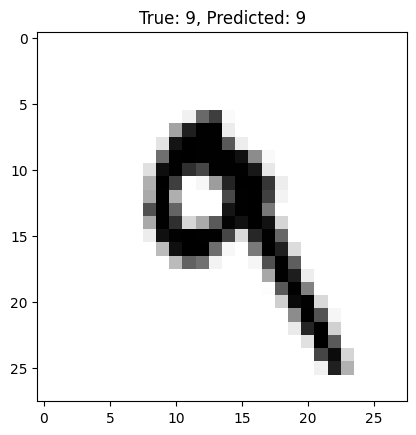

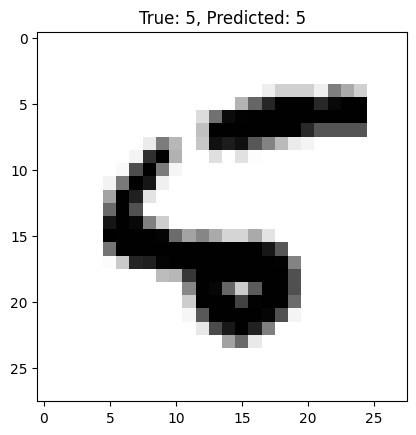

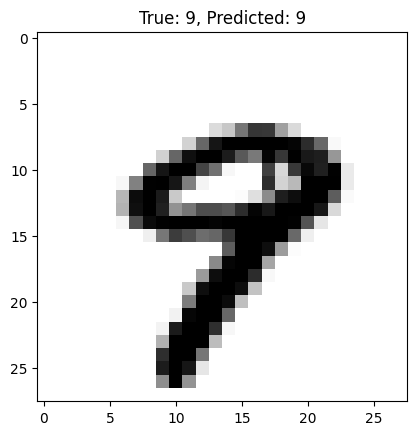

In [50]:
import matplotlib.pyplot as plt
import numpy as np

# Example: Visualize the first 10 test images and their predicted labels
num_images = 10
predictions = model.predict(x_test[:num_images])
for i in range(num_images):
    plt.imshow(x_test[i], cmap=plt.cm.binary)
    predicted_class = np.argmax(predictions[i])
    plt.title(f"True: {y_test[i]}, Predicted: {predicted_class}")
    plt.show()

#confusion matrix

313/313 [==============================] - 1s 4ms/step


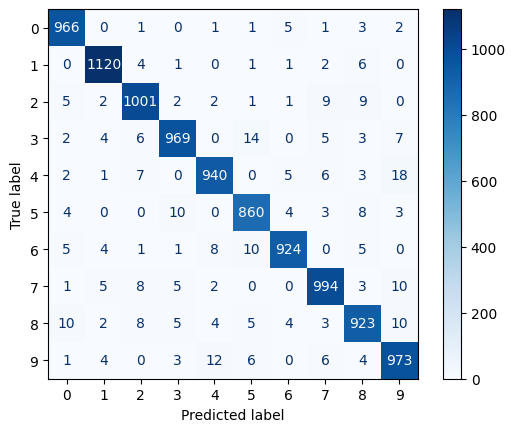

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Calculate predictions for the entire test set
predictions = model.predict(x_test)

# Get the predicted labels as integers
y_pred = np.argmax(predictions, axis=1)

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_test))
disp.plot(cmap=plt.cm.Blues)
plt.show()

Each row represents the actual class of an instance. Each column represents the predicted class.

For example:

The first row shows that 966 instances that were actually class 0 were correctly classified as class 0. There were 0 instances that were actually class 0 but were misclassified as class 1, and so on.
The second row shows that 1120 instances that were actually class 1 were correctly classified as class 1. There were 4 instances that were actually class 1 but were misclassified as class 2, and so on.
The diagonal of the matrix shows the number of correctly classified instances for each class. The off-diagonal elements show the number of misclassified instances.

#Graph plotting for accuracy and loss

Epoch 1/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0233 - accuracy: 0.9925 - val_loss: 0.2584 - val_accuracy: 0.9648
Epoch 2/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0227 - accuracy: 0.9926 - val_loss: 0.2739 - val_accuracy: 0.9655
Epoch 3/5
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0215 - accuracy: 0.9935 - val_loss: 0.2794 - val_accuracy: 0.9646
Epoch 4/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0212 - accuracy: 0.9931 - val_loss: 0.2877 - val_accuracy: 0.9657
Epoch 5/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.0205 - accuracy: 0.9935 - val_loss: 0.2933 - val_accuracy: 0.9649


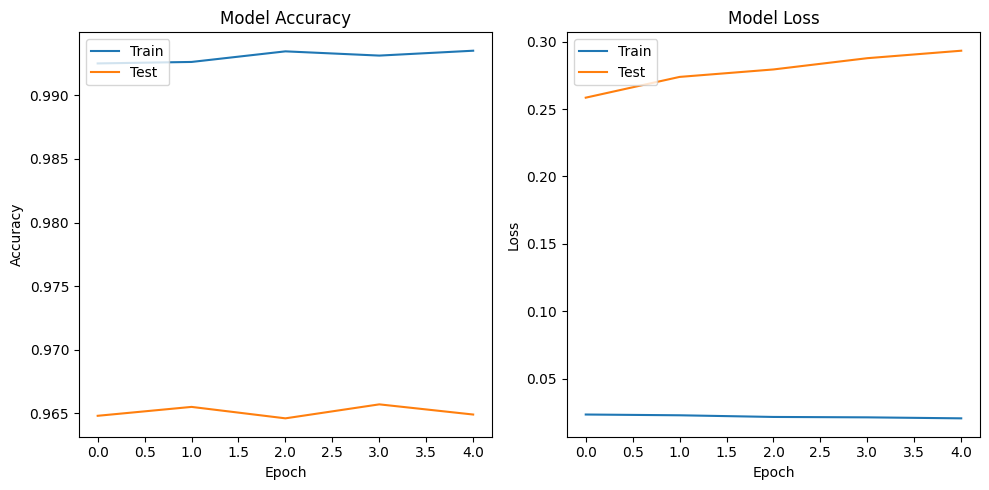

In [52]:
import matplotlib.pyplot as plt

# Assuming you have `history` object which stores training history
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_test, y_test))

# Plot training & validation accuracy values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()


#Evaluation

In [54]:
import pandas as pd
import numpy as np

# Example: Assuming predictions and true labels are available
num_test_samples = len(y_test)
predicted_labels = np.argmax(predictions, axis=1)  # Convert softmax outputs to labels

# Determine correct and incorrect predictions
correct_predictions = (predicted_labels == y_test)
incorrect_predictions = (predicted_labels!= y_test)

# Count correct and incorrect predictions
correct_count = np.sum(correct_predictions)
incorrect_count = np.sum(incorrect_predictions)

# Calculate accuracy
accuracy = correct_count / num_test_samples * 100

# Create a summary table
summary_data = {
    'Metric': ['Correct Predictions', 'Incorrect Predictions', 'Total Samples', 'Accuracy'],
    'Count': [correct_count, incorrect_count, num_test_samples, f"{accuracy:.2f}%"]
}

summary_df = pd.DataFrame(summary_data)

print("Summary of Predictions:")
print(summary_df)

Summary of Predictions:
                  Metric   Count
0    Correct Predictions    9670
1  Incorrect Predictions     330
2          Total Samples   10000
3               Accuracy  96.70%
